In [569]:
import glob
import os
import pandas as pd
import matplotlib.pyplot as plt
import pycaret
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib
import numpy as np
matplotlib.rc('xtick', labelsize=25) 
matplotlib.rc('ytick', labelsize=25)
font = {'size'   : 25,
        'weight' : 'bold'}
matplotlib.rc('font', **font)
zone_colours = ["blue","red"]
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from pycaret.regression import *
from scipy.ndimage import median_filter

# Importing Libraries

# Loading Data

#### Training Paths

In [585]:
train_paths = glob.glob(os.path.join(r"C:\work\Global_Petrophysics_ML\All_data\Training_csv","*.csv"))
training_data = [pd.read_csv(i) for i in train_paths]
train_paths

['C:\\work\\Global_Petrophysics_ML\\All_data\\Training_csv\\M_1.csv',
 'C:\\work\\Global_Petrophysics_ML\\All_data\\Training_csv\\_7.csv',
 'C:\\work\\Global_Petrophysics_ML\\All_data\\Training_csv\\_8.csv',
 'C:\\work\\Global_Petrophysics_ML\\All_data\\Training_csv\\__3.csv']

In [586]:
training_data = [training_data[-1]]
training_data

[       DEPTH      GR  CALI    BS   VCL    SW  NPHI  PHIE  RHOB     DT    RES  \
 0   3701.941  69.171 8.527 8.500 0.631 1.000 0.339 0.010 2.663 74.547  4.070   
 1   3702.370  78.646 8.527 8.500 0.525 1.000 0.274 0.010 2.656 72.261  6.467   
 2   3702.799  82.886 8.499 8.500 0.520 1.000 0.281 0.010 2.672 71.129 14.100   
 3   3703.227  51.586 8.456 8.500 0.343 0.363 0.186 0.037 2.588 73.606 18.168   
 4   3703.657  26.317 8.407 8.500 0.156 0.245 0.130 0.122 2.446 78.822 16.241   
 ..       ...     ...   ...   ...   ...   ...   ...   ...   ...    ...    ...   
 180 3779.125 145.489 6.192 6.000 0.710 1.000 0.301 0.000 2.762 83.347  5.333   
 181 3779.554 152.091 6.228 6.000 0.724 1.000 0.316 0.000 2.742 81.866  5.037   
 182 3779.983 130.806 6.189 6.000 0.631 1.000 0.252 0.000 2.725 76.535  6.038   
 183 3780.412 104.612 6.085 6.000 0.561 1.000 0.166 0.000 2.617 73.704  6.064   
 184 3780.840  90.598 6.211 6.000 0.432 1.000 0.131 0.019 2.494 72.867  6.298   
 
          Formation  
 0  

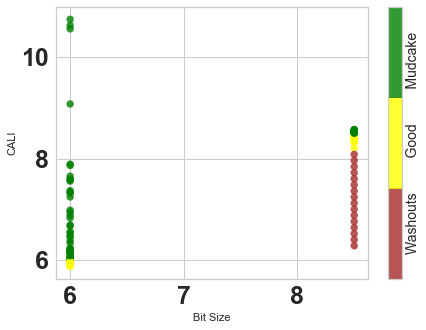

In [587]:
name=["Zamzama-03","Zamzama-07","Zamzama-08"]
for i in range(len(training_data)):
    if ("BS" in training_data[i].columns)&("CALI" in training_data[i].columns):
        a =  training_data[i][["DEPTH","GR","BS","CALI","RHOB","RES","DT","Formation"]].dropna(how="any")
        a["Diff"] = a["BS"]-a["CALI"]
        a.loc[a[a["Diff"]>0.3].index,"Hole"]=0
        a.loc[a[(a["Diff"]>=0)&(a["Diff"]<=0.3)].index,"Hole"]=1
        a.loc[a[a["Diff"]<0].index,"Hole"]=2
        cmap = ListedColormap(["brown","yellow","green"])
        fig = plt.figure(figsize=(7,5))
        third = a["Hole"]
        plt.scatter(a["BS"], a["CALI"], s = 50, c = third, alpha = 0.8,cmap=cmap)
        cb = plt.colorbar()
        plt.xlabel("Bit Size")
        plt.ylabel("CALI")
        cb.set_label("Washouts Good Mudcake".replace(" "," "*9),fontsize=14,fontweight=30)
        cb.set_ticks([])
        plt.show()

# Zamzama-03

In [588]:
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

In [589]:
FEAT = ["DEPTH","GR","RHOB","DT","Formation","RES","NPHI","BS","CALI"]
A =  training_data[-1][FEAT].dropna(how="any")
# A["Diff"] = np.abs(A["BS"]-A["CALI"])
# FEAT = ["DEPTH","GR","BS","RHOB","RES","DT","Formation","CALI","Diff"]

In [590]:
A

,DEPTH,GR,RHOB,DT,Formation,RES,NPHI,BS,CALI
0,3701.941,69.171,2.663,74.547,Khadro Sand,4.070,0.339,8.500,8.527
1,3702.370,78.646,2.656,72.261,Khadro Sand,6.467,0.274,8.500,8.527
2,3702.799,82.886,2.672,71.129,Khadro Sand,14.100,0.281,8.500,8.499
3,3703.227,51.586,2.588,73.606,Khadro Sand,18.168,0.186,8.500,8.456
4,3703.657,26.317,2.446,78.822,Khadro Sand,16.241,0.130,8.500,8.407
...,...,...,...,...,...,...,...,...,...
180,3779.125,145.489,2.762,83.347,Pab Formation,5.333,0.301,6.000,6.192
181,3779.554,152.091,2.742,81.866,Pab Formation,5.037,0.316,6.000,6.228
182,3779.983,130.806,2.725,76.535,Pab Formation,6.038,0.252,6.000,6.189
183,3780.412,104.612,2.617,73.704,Pab Formation,6.064,0.166,6.000,6.085


In [591]:
import seaborn as sns

<Figure size 720x576 with 0 Axes>

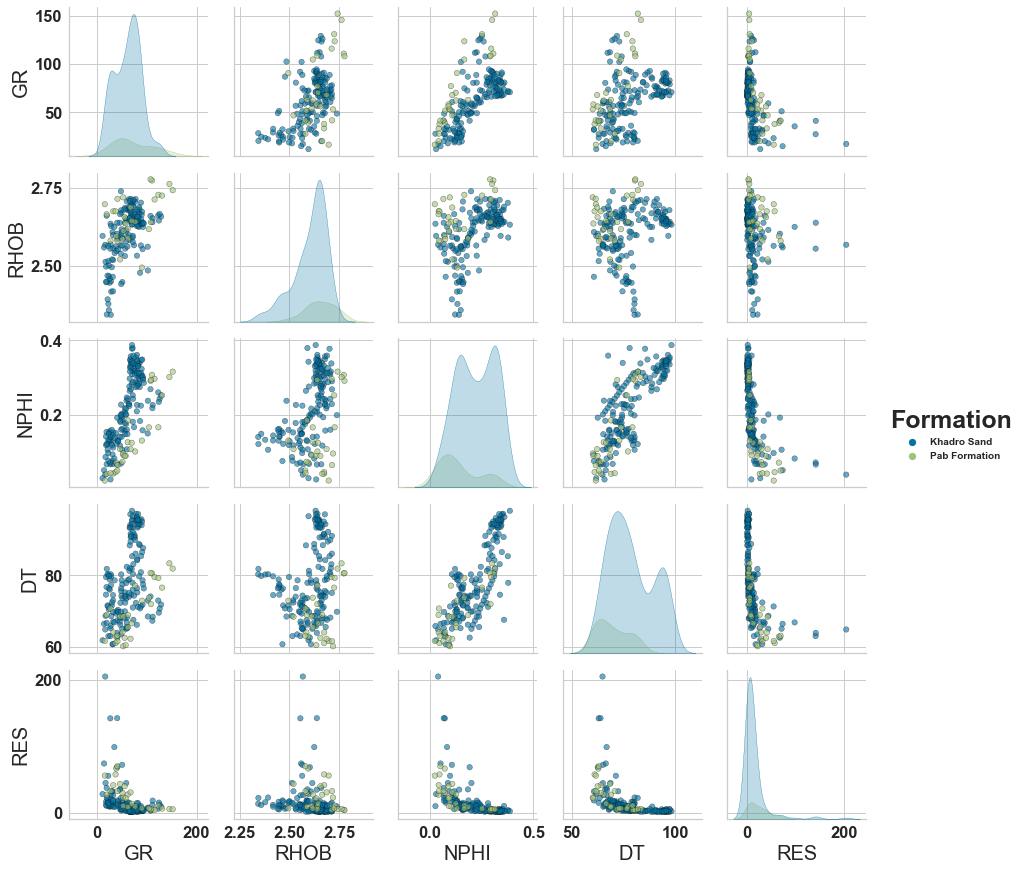

In [592]:
plt.figure(figsize=(10,8))
with sns.plotting_context(rc={'xtick.labelsize': 16.5,'ytick.labelsize': 16.5,'axes.labelsize':20}):
    sns.pairplot(A, vars=["GR","RHOB","NPHI","DT","RES"], diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 30, 'edgecolor': 'k'},hue="Formation")





In [609]:
from sklearn.svm import OneClassSVM
svm = OneClassSVM(nu=0.1)
fest = ["RES"]
a = [A[["DEPTH","GR","Formation","RHOB","DT","NPHI"]]]
for i in fest:
    yhat = svm.fit_predict(A[[i]])
    mask = yhat != -1
    cc= A[FEAT][mask][i]
    a.append(cc)
a = pd.concat(a,axis=1)

In [610]:
from sklearn.svm import OneClassSVM
svm = OneClassSVM(nu=0.1)
fest = ["RHOB","RES","DT","NPHI"]
yhat = svm.fit_predict(A[fest])
mask = yhat != -1
cc= A[FEAT][mask]
a = cc
a

,DEPTH,GR,RHOB,DT,Formation,RES,NPHI,BS,CALI
0,3701.941,69.171,2.663,74.547,Khadro Sand,4.070,0.339,8.500,8.527
1,3702.370,78.646,2.656,72.261,Khadro Sand,6.467,0.274,8.500,8.527
2,3702.799,82.886,2.672,71.129,Khadro Sand,14.100,0.281,8.500,8.499
3,3703.227,51.586,2.588,73.606,Khadro Sand,18.168,0.186,8.500,8.456
4,3703.657,26.317,2.446,78.822,Khadro Sand,16.241,0.130,8.500,8.407
...,...,...,...,...,...,...,...,...,...
180,3779.125,145.489,2.762,83.347,Pab Formation,5.333,0.301,6.000,6.192
181,3779.554,152.091,2.742,81.866,Pab Formation,5.037,0.316,6.000,6.228
182,3779.983,130.806,2.725,76.535,Pab Formation,6.038,0.252,6.000,6.189
183,3780.412,104.612,2.617,73.704,Pab Formation,6.064,0.166,6.000,6.085


In [595]:

a0 = A[fest][np.abs(A[fest] - A[fest].mean()) <= (3 * A[fest].std())]
# # Method 1: Standard Deviation Method (traditional)
# well_train_std = well_train_drop[np.abs(well_train_drop - well_train_drop.mean()) <= (3 * well_train_drop.std())]

# ## delete all rows that have NaNs
# well_train_std = well_train_std.dropna()

# Method 2: Isolation Forest
iso = IsolationForest(contamination=0.5)
yhat = iso.fit_predict(A[fest])
mask = yhat != -1
cc = A[FEAT][mask]
a1 = cc

# Method 3: Minimum Covariance Determinant
ee = EllipticEnvelope(contamination=0.1)
yhat = ee.fit_predict(A[fest])
mask = yhat != -1
cc = A[FEAT][mask]
a2 = cc

# Method 4: Local Outlier Factor
lof = LocalOutlierFactor(contamination=0.3)
yhat = lof.fit_predict(A[fest])
mask = yhat != -1
cc = A[FEAT][mask]
a3 = cc

# Method 5: One-class SVM
svm = OneClassSVM(nu=0.1)
yhat = svm.fit_predict(A[fest])
mask = yhat != -1
cc = A[FEAT][mask]
a4 = cc

In [596]:
a[fest]

,RHOB,RES,DT,NPHI
0,2.663,4.070,74.547,0.339
1,2.656,6.467,72.261,0.274
2,2.672,14.100,71.129,0.281
3,2.588,18.168,73.606,0.186
4,2.446,16.241,78.822,0.130
...,...,...,...,...
180,2.762,5.333,83.347,0.301
181,2.742,5.037,81.866,0.316
182,2.725,6.038,76.535,0.252
183,2.617,6.064,73.704,0.166


<AxesSubplot:>

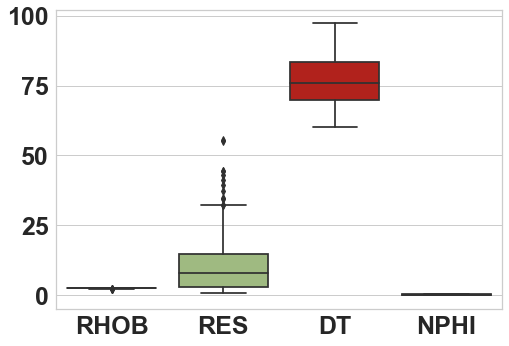

In [597]:
sns.boxplot(data=a[fest])

In [598]:
d = pd.DataFrame([])

d["Inliers"] = [len(A),len(a0),len(a1),len(a2),len(a3),len(a4)]
d.index = ["Original","Standard Deviation","Isolation Forest","Min. Covariance","Outlier Factor","One-class SVM"]
d["Outliers"] = [len(A)-len(A),len(A)-len(a0),len(A)-len(a1),len(A)-len(a2),len(A)-len(a3),len(A)-len(a4)]
d = d.astype("float")
d.index.name="ML"

Text(37.999999999999986, 0.5, 'Machine Learning Algorithms')

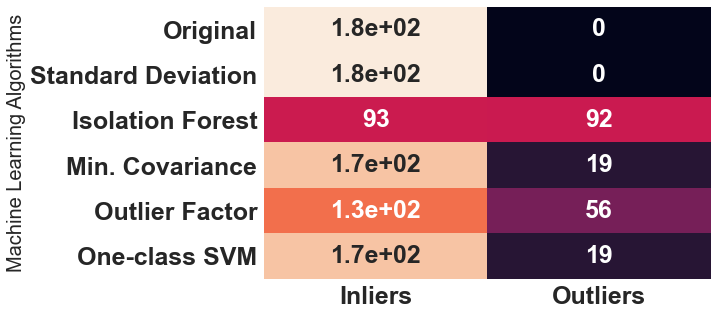

In [599]:
plt.figure(figsize=(8,5))
sns.heatmap(d,annot=True,cbar=False,)
plt.ylabel("Machine Learning Algorithms",fontsize=20)

Number of points before outliers removed                       : 166
Number of points after outliers removed with Standard Deviation: 185
Number of points after outliers removed with Isolation Forest  : 93
Number of points after outliers removed with Min. Covariance   : 166
Number of points after outliers removed with Outlier Factor    : 129
Number of points after outliers removed with One-class SVM     : 166


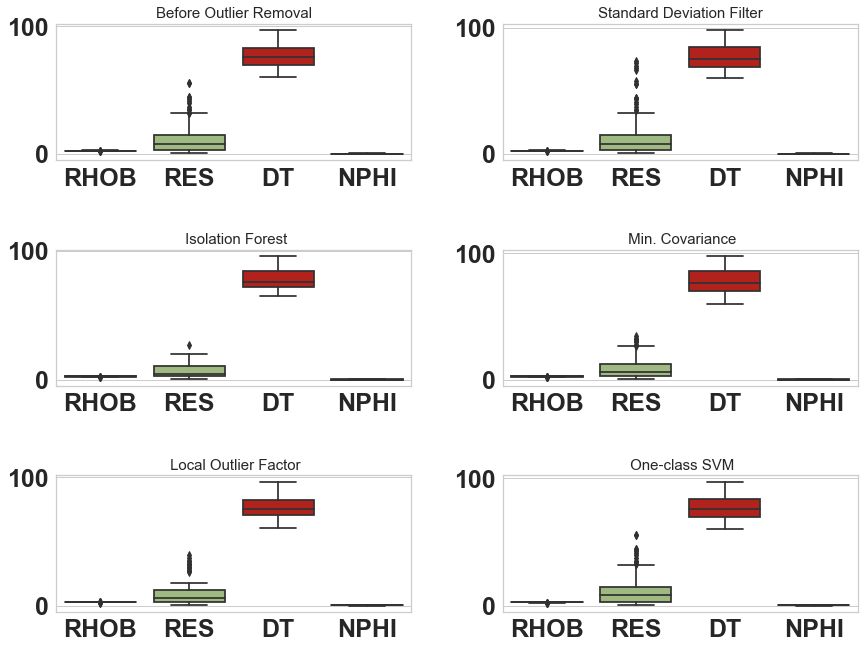

In [600]:
print('Number of points before outliers removed                       :', len(a))
print('Number of points after outliers removed with Standard Deviation:', len(a0))
print('Number of points after outliers removed with Isolation Forest  :', len(a1))
print('Number of points after outliers removed with Min. Covariance   :', len(a2))
print('Number of points after outliers removed with Outlier Factor    :', len(a3))
print('Number of points after outliers removed with One-class SVM     :', len(a4))

plt.figure(figsize=(13,10))

plt.subplot(3,2,1)
sns.boxplot(data=a[fest])

plt.title('Before Outlier Removal', size=15)

plt.subplot(3,2,2)
sns.boxplot(data=a0[fest])
plt.title('Standard Deviation Filter', size=15)

plt.subplot(3,2,3)
sns.boxplot(data=a1[fest])
plt.title(' Isolation Forest', size=15)

plt.subplot(3,2,4)
sns.boxplot(data=a2[fest])
plt.title(' Min. Covariance', size=15)

plt.subplot(3,2,5)
sns.boxplot(data=a3[fest])
plt.title(' Local Outlier Factor', size=15)

plt.subplot(3,2,6)
sns.boxplot(data=a4[fest])
plt.title(' One-class SVM', size=15)

plt.tight_layout(1.7)
plt.show()

In [601]:
# a[["DT"]]= a[["DT"]].interpolate().values
# a

<Figure size 720x576 with 0 Axes>

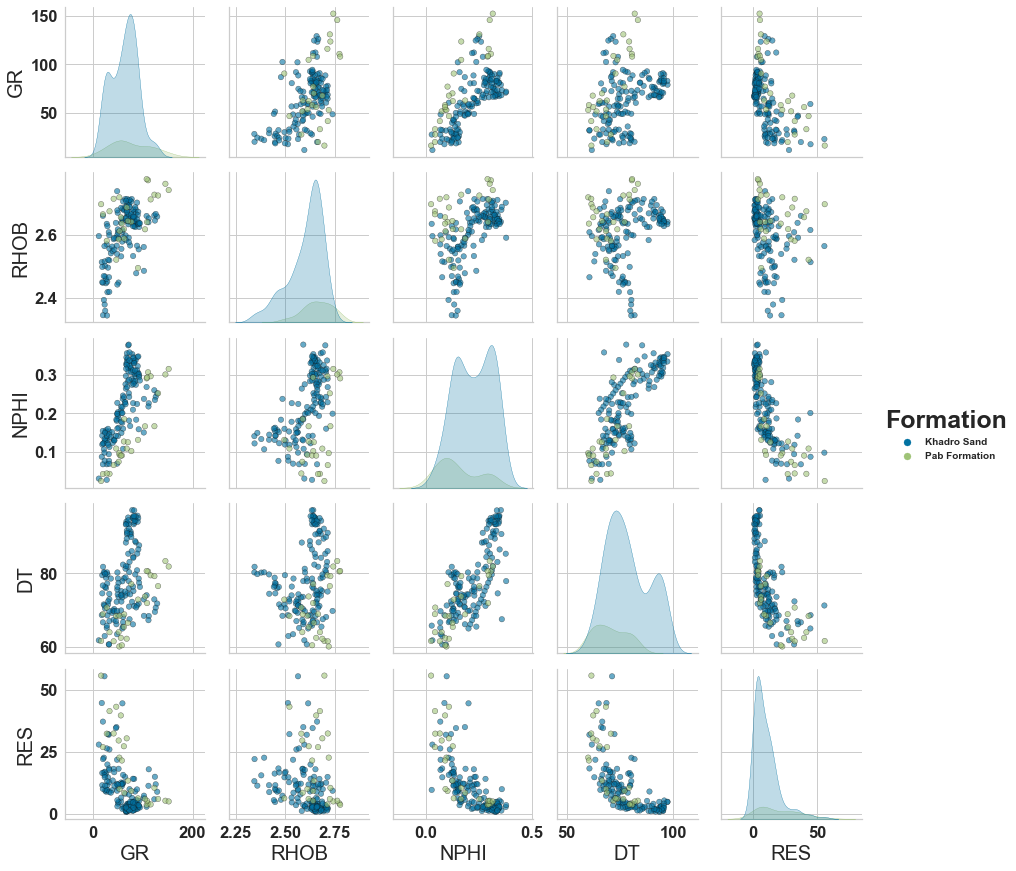

In [602]:
plt.figure(figsize=(10,8))
with sns.plotting_context(rc={'xtick.labelsize': 16.5,'ytick.labelsize': 16.5,'axes.labelsize':20}):
    sns.pairplot(a4, vars=["GR","RHOB","NPHI","DT","RES"], diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 30, 'edgecolor': 'k'},hue="Formation")





In [606]:
a= A

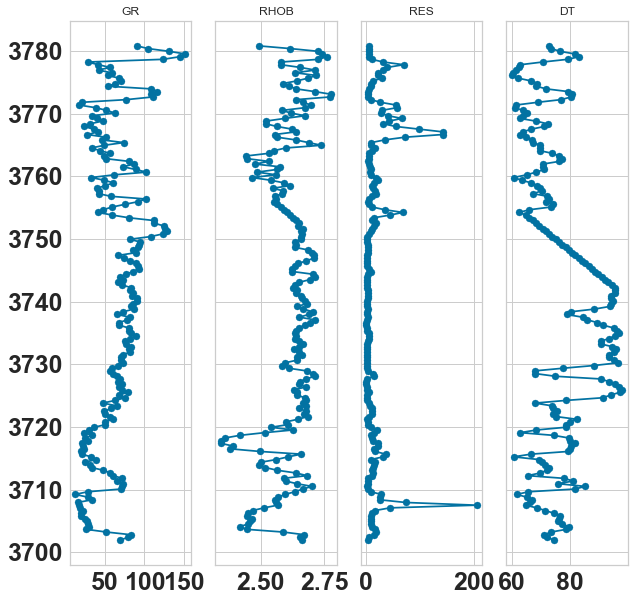

In [607]:
plotting = ["GR","RHOB","RES","DT"]
fig,ax = plt.subplots(nrows=1,ncols=len(plotting),figsize=(10,10),sharey=True)
for j,i in enumerate(plotting):
    ax[j].plot(A[i],A["DEPTH"])
    ax[j].scatter(a[i],a["DEPTH"])
    ax[j].set_title(i)

In [1]:
SEL =a[(a["Diff"]<=0.1)].dropna(how="any")
SEL

In [562]:
a = A

In [563]:
A

,DEPTH,GR,RHOB,DT,Formation,RES,NPHI,BS,CALI
0,3701.941,69.171,2.663,74.547,Khadro Sand,4.070,0.339,8.500,8.527
1,3702.370,78.646,2.656,72.261,Khadro Sand,6.467,0.274,8.500,8.527
2,3702.799,82.886,2.672,71.129,Khadro Sand,14.100,0.281,8.500,8.499
3,3703.227,51.586,2.588,73.606,Khadro Sand,18.168,0.186,8.500,8.456
4,3703.657,26.317,2.446,78.822,Khadro Sand,16.241,0.130,8.500,8.407
...,...,...,...,...,...,...,...,...,...
180,3779.125,145.489,2.762,83.347,Pab Formation,5.333,0.301,6.000,6.192
181,3779.554,152.091,2.742,81.866,Pab Formation,5.037,0.316,6.000,6.228
182,3779.983,130.806,2.725,76.535,Pab Formation,6.038,0.252,6.000,6.189
183,3780.412,104.612,2.617,73.704,Pab Formation,6.064,0.166,6.000,6.085


In [404]:
# SEL.isnull().sum()

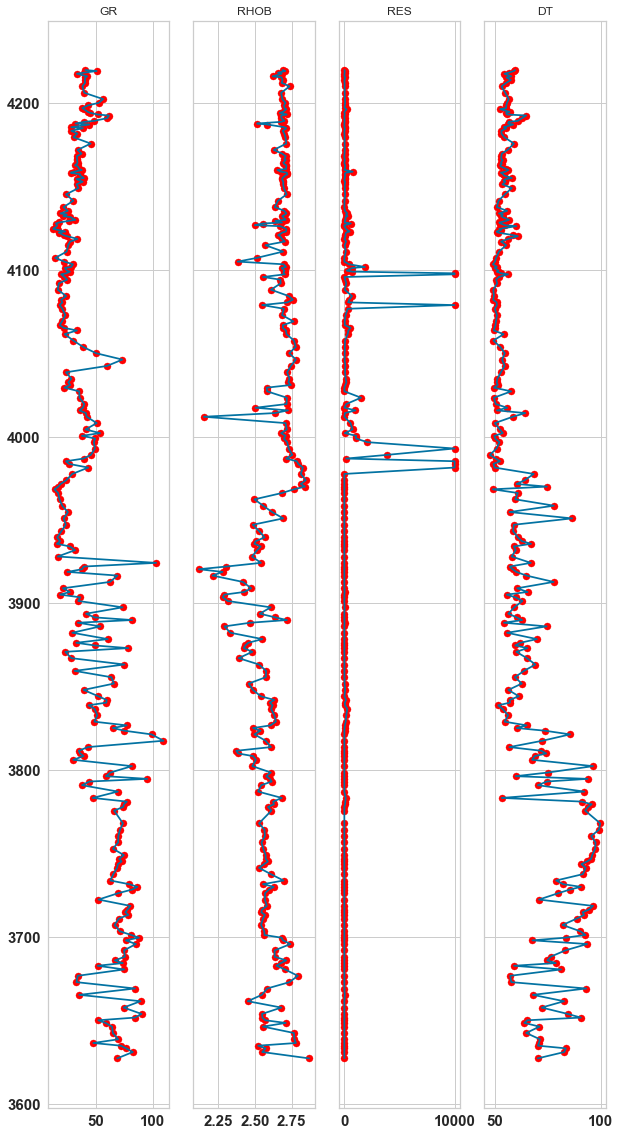

In [405]:
plotting = ["GR","RHOB","RES","DT"]
fig,ax = plt.subplots(nrows=1,ncols=len(plotting),figsize=(10,20),sharey=True)
for j,i in enumerate(plotting):
    if i=="BS":
        ax[j].plot(a[i],a["DEPTH"])
        ax[j].plot(a["CALI"],a["DEPTH"],color="red",label="CALI")
        ax[j].scatter(SEL[i],SEL["DEPTH"],s=50,color="red")
        ax[j].invert_yaxis()
        ax[j].set_title(i)
        ax[j].legend()
    else:
        ax[j].plot(a[i],a["DEPTH"])
        ax[j].scatter(SEL[i],SEL["DEPTH"],s=50,color="red")
        ax[j].set_title(i)

# Splice Zone

In [406]:
depth_mark=int(input("Enter the mark zone start : "))
depth_mark_max=int(input("Enter the mark zone end : "))

Enter the mark zone start : 3950
Enter the mark zone end : 4020


In [411]:
SEL["DEPTH"] = a["DEPTH"]
SEL["Formation"] = a["Formation"]

In [412]:
IND = SEL[(SEL["DEPTH"]>=depth_mark)&(SEL["DEPTH"]<=depth_mark_max)].index
SEL = SEL.drop(IND)

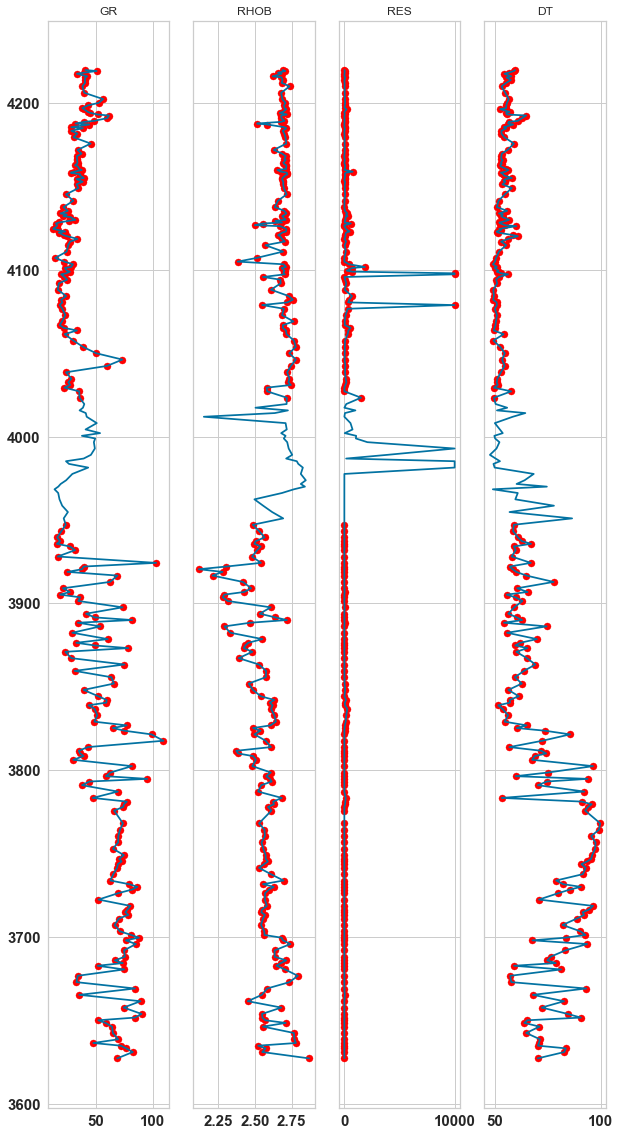

In [413]:
plotting = ["GR","RHOB","RES","DT"]
fig,ax = plt.subplots(nrows=1,ncols=len(plotting),figsize=(10,20),sharey=True)
for j,i in enumerate(plotting):
    if i=="BS":
        ax[j].plot(a[i],a["DEPTH"])
        ax[j].plot(a["CALI"],a["DEPTH"],color="red",label="CALI")
        ax[j].scatter(SEL[i],SEL["DEPTH"],s=50,color="red")
        ax[j].invert_yaxis()
        ax[j].set_title(i)
        ax[j].legend()
    else:
        ax[j].plot(a[i],a["DEPTH"])
        ax[j].scatter(SEL[i],SEL["DEPTH"],s=50,color="red")
        ax[j].set_title(i)

In [414]:
features = SEL[["GR","RHOB","Formation","RES","DT"]]
reg = setup(data = features, target = 'RHOB',verbose=False,remove_outliers=True,silent=True)

In [415]:
c1=compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,0.0707,0.0103,0.0991,0.2286,0.0280,0.0279,0.0070
ridge,Ridge Regression,0.0704,0.0103,0.0990,0.2274,0.0280,0.0277,0.0070
huber,Huber Regressor,0.0691,0.0107,0.1006,0.2249,0.0285,0.0275,0.0100
lr,Linear Regression,0.0702,0.0103,0.0992,0.2178,0.0280,0.0276,0.0070
lar,Least Angle Regression,0.0702,0.0103,0.0992,0.2178,0.0280,0.0276,0.0070
rf,Random Forest Regressor,0.0630,0.0096,0.0950,0.1958,0.0270,0.0248,0.0490
lightgbm,Light Gradient Boosting Machine,0.0644,0.0097,0.0956,0.1562,0.0272,0.0253,0.0080
omp,Orthogonal Matching Pursuit,0.0743,0.0115,0.1053,0.1373,0.0299,0.0294,0.0070
ada,AdaBoost Regressor,0.0695,0.0102,0.0980,0.1269,0.0278,0.0272,0.0150
gbr,Gradient Boosting Regressor,0.0662,0.0102,0.0980,0.1190,0.0278,0.0260,0.0120


Text(46.999999999999986, 0.5, 'Machine Learning Models')

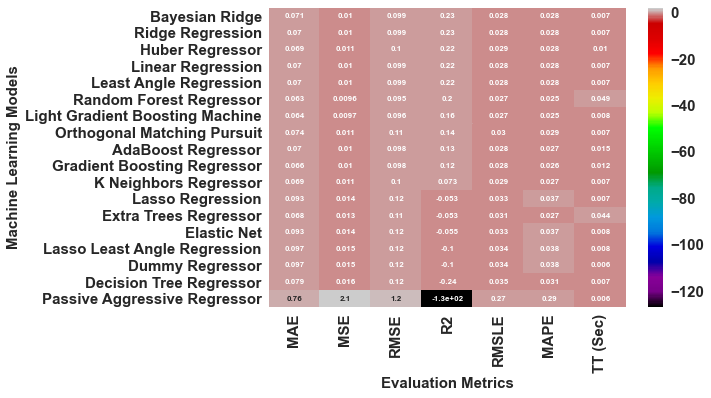

In [416]:
df = pull()
# cmap = ListedColormap(["lightskyblue"]*2)
df.index = df["Model"]
df = df.drop(columns="Model")
sns.heatmap(df,annot=True,annot_kws={"size": 8},cmap="nipy_spectral")
plt.xlabel("Evaluation Metrics",fontdict={"fontsize":15,"fontweight":'bold'})
plt.ylabel("Machine Learning Models",fontdict={"fontsize":15,"fontweight":'bold'})

In [417]:
final_lightgbm = finalize_model('et')
test = a[["GR","Formation","RES","DT"]]
unseen_predictions = predict_model(final_lightgbm, data=test)
unseen_predictions

,GR,Formation,RES,DT,Label
0,68.564,Khadro Sand,0.577,70.167,2.867
1,82.398,Khadro Sand,0.340,82.836,2.550
2,76.492,Khadro Sand,0.505,83.548,2.573
3,71.660,Khadro Sand,0.847,70.309,2.522
4,47.400,Khadro Sand,1.903,70.765,2.778
...,...,...,...,...,...
251,41.923,Pab Formation,10.213,57.643,2.621
252,32.908,Pab Formation,13.064,54.413,2.681
253,39.019,Pab Formation,30.468,56.370,2.657
254,50.408,Pab Formation,29.345,58.864,2.706


In [418]:
# gbr = create_model('rf')
# final_lightgbm = finalize_model(gbr)
# test = a[["GR","Formation","RES","DT"]]
# unseen_predictions = predict_model(final_lightgbm, data=test)

In [419]:
m = int(a["GR"].max())
d = []
for i in a["GR"]:
    z = np.nan*(np.ones(m))
    z[:int(i)+1] = i
    z = z.reshape(1,-1)
    d.append(z)
gr = pd.DataFrame(np.concatenate(d))
gr["data"] = a["GR"]

In [420]:
a["CORRECT RHOB"]  = unseen_predictions["Label"]

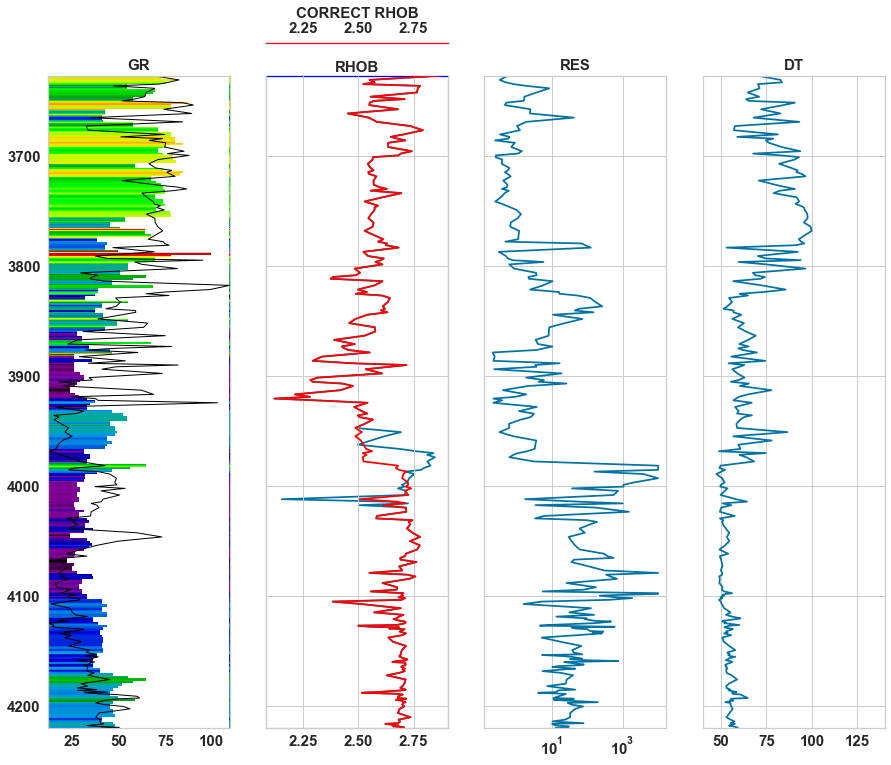

In [421]:
plotting = ["GR","RHOB","RES","DT"]
fig,ax = plt.subplots(nrows=1,ncols=len(plotting),figsize=(15,12),sharey=True)
for j,i in enumerate(plotting):
    if i=="RHOB":
        ax[j].plot(a[i],a["DEPTH"])
        ax[j].spines["top"].set_position(("axes", 1))

        ax[j].spines["top"].set_visible(True)
        ax[j].spines["top"].set_edgecolor("blue")
        ax[j].set_xlabel("RHOB",fontdict={"fontsize":15,"fontweight":'bold'})
        ax[j].xaxis.set_label_position("top")
        ax[j] = ax[j].twiny()
        ax[j].spines["top"].set_visible(True)
        ax[j].spines["top"].set_edgecolor("red")
        ax[j].plot(a["CORRECT RHOB"],a["DEPTH"],color="red",label="CORRECT RHOB")
        ax[j].spines["top"].set_position(("axes", 1.05))
        ax[j].xaxis.set_ticks_position("top")
        ax[j].set_xlabel("CORRECT RHOB",fontdict={"fontsize":15,"fontweight":'bold'})
      
        
    elif i=="GR":
        a0 = ax[j].imshow(gr,aspect="auto",cmap="nipy_spectral",extent=[a["GR"].min(),a["GR"].max(),a["DEPTH"].max(),a["DEPTH"].min()])
        ax[j].plot(a["GR"],a["DEPTH"],color="black",label="GR",linewidth=1)
        ax[j].set_title(i,fontdict={"fontsize":15,"fontweight":'bold'})
        ax[j].grid(False)
    elif i=="BS":
        ax[j].plot(a[i],a["DEPTH"])
        ax[j].fill_betweenx(a['DEPTH'], 12, a["CALI"], interpolate=True, color='tan')
        ax[j].plot(a["CALI"],a["DEPTH"],color="red",label="CALI")
        ax[j].fill_betweenx(a['DEPTH'], 0, a["BS"], interpolate=True, color='tan')
        ax[j].fill_betweenx(a['DEPTH'], a["BS"],a["CALI"],where=a["BS"]>=a["CALI"], interpolate=True, color='green')
        ax[j].set_xlim([a["CALI"].min()-2,a["CALI"].max()])
        ax[j].set_title(i,fontdict={"fontsize":15,"fontweight":'bold'})
        
    elif i=="RES":
        ax[j].semilogx(a[i],a["DEPTH"])
        ax[j].set_title(i,fontdict={"fontsize":15,"fontweight":'bold'})
    elif i=="DT":
        ax[j].plot(a[i],a["DEPTH"])
        ax[j].set_title(i,fontdict={"fontsize":15,"fontweight":'bold'})
        ax[j].set_xlim([40,140])
    else:
        ax[j].plot(a[i],a["DEPTH"])
        ax[j].set_title(i,fontdict={"fontsize":15,"fontweight":'bold'})

In [422]:
# SEL = a[(a["Diff"]<=0.6)]
SEL = a
SEL["DEPTH"] = a["DEPTH"]
SEL["Formation"] = a["Formation"]

In [423]:
SEL

,DEPTH,GR,RHOB,DT,Formation,RES,CORRECT RHOB
0,3627.1201,68.564,2.867,70.167,Khadro Sand,0.577,2.867
1,3630.9299,82.398,2.550,82.836,Khadro Sand,0.340,2.550
2,3633.1399,76.492,2.573,83.548,Khadro Sand,0.505,2.573
3,3634.7400,71.660,2.522,70.309,Khadro Sand,0.847,2.522
4,3636.3401,47.400,2.778,70.765,Khadro Sand,1.903,2.778
...,...,...,...,...,...,...,...
251,4216.0698,41.923,2.621,57.643,Pab Formation,10.213,2.621
252,4217.6699,32.908,2.681,54.413,Pab Formation,13.064,2.681
253,4218.2798,39.019,2.657,56.370,Pab Formation,30.468,2.657
254,4219.2700,50.408,2.706,58.864,Pab Formation,29.345,2.706


In [424]:
features = SEL[["GR","CORRECT RHOB","RES","Formation"]]

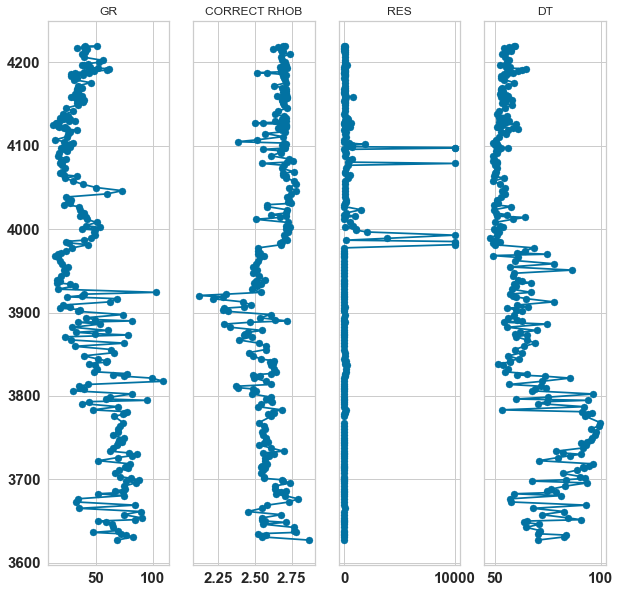

In [425]:
# plotting = ["GR","BS","CORRECT RHOB","RES","DT","NPHI"]
plotting = ["GR","CORRECT RHOB","RES","DT"]
fig,ax = plt.subplots(nrows=1,ncols=len(plotting),figsize=(10,10),sharey=True)
for j,i in enumerate(plotting):
    if i=="BS":
        ax[j].plot(a[i],a["DEPTH"])
        ax[j].plot(a["CALI"],a["DEPTH"],color="red",label="CALI")
        ax[j].scatter(SEL[i],SEL["DEPTH"])
        ax[j].set_title(i)
        ax[j].legend()
    else:
        ax[j].plot(a[i],a["DEPTH"])
        ax[j].scatter(SEL[i],SEL["DEPTH"])
        ax[j].set_title(i)

In [426]:
# features = SEL[["GR","CORRECT RHOB","RES","Formation","NPHI","DT"]]
# reg = setup(data = features, target = 'NPHI',verbose=False,remove_outliers=True,fold=10,silent=True)

In [427]:
# c2=compare_models()

In [428]:
# df = pull()
# # cmap = ListedColormap(["lightskyblue"]*2)
# df.index = df["Model"]
# df = df.drop(columns="Model")
# sns.heatmap(df,annot=True,annot_kws={"size": 8},cmap="nipy_spectral")
# plt.xlabel("Evaluation Metrics",fontdict={"fontsize":15,"fontweight":'bold'})
# plt.ylabel("Machine Learning Models",fontdict={"fontsize":15,"fontweight":'bold'})

In [429]:
# gbr = create_model('et')
# final_lightgbm = finalize_model(gbr)
# test = a[["GR","CORRECT RHOB","RES","Formation","DT"]]
# unseen_predictions = predict_model(final_lightgbm, data=test)
# unseen_predictions

In [430]:
# a["CORRECT NPHI"]  = unseen_predictions["Label"]
# a

In [431]:
# SEL = a[(a["Diff"]<=0.6)]
SEL = SEL

In [432]:
features = SEL[["GR","CORRECT RHOB","RES","Formation","DT"]]
reg = setup(data = features, target = 'DT',verbose=False,remove_outliers=True,silent=True)

In [433]:
c2=compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,4.1998,39.4441,5.9013,0.7379,0.0841,0.0625,0.0470
et,Extra Trees Regressor,4.3608,44.1256,6.1541,0.7163,0.0873,0.0650,0.0450
gbr,Gradient Boosting Regressor,4.5059,46.4490,6.4226,0.7059,0.0919,0.0673,0.0120
lightgbm,Light Gradient Boosting Machine,4.5383,44.4541,6.3850,0.6961,0.0912,0.0683,0.0090
ada,AdaBoost Regressor,5.0761,50.0443,6.7727,0.6520,0.0987,0.0786,0.0170
knn,K Neighbors Regressor,5.1362,55.7137,6.9897,0.6457,0.0989,0.0767,0.0090
dt,Decision Tree Regressor,5.1105,65.5917,7.5189,0.6043,0.1063,0.0767,0.0070
huber,Huber Regressor,6.4392,78.2798,8.6334,0.4261,0.1214,0.0948,0.0100
lar,Least Angle Regression,6.4934,76.5894,8.5538,0.4178,0.1208,0.0971,0.0070
lr,Linear Regression,6.4934,76.5893,8.5538,0.4178,0.1208,0.0971,0.0070


Text(46.999999999999986, 0.5, 'Machine Learning Models')

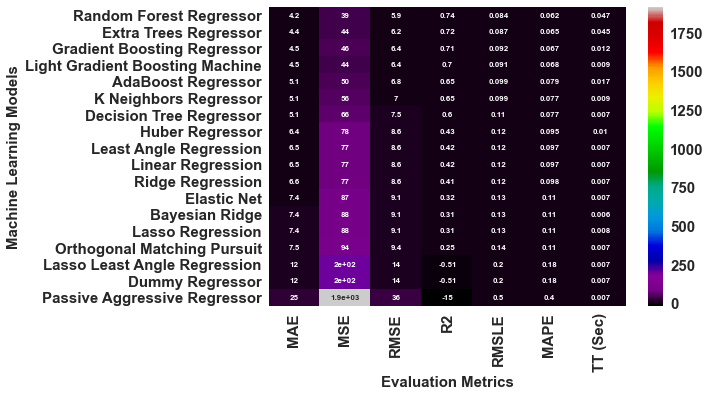

In [434]:
df = pull()
# cmap = ListedColormap(["lightskyblue"]*2)
df.index = df["Model"]
df = df.drop(columns="Model")
sns.heatmap(df,annot=True,annot_kws={"size": 8},cmap="nipy_spectral")
plt.xlabel("Evaluation Metrics",fontdict={"fontsize":15,"fontweight":'bold'})
plt.ylabel("Machine Learning Models",fontdict={"fontsize":15,"fontweight":'bold'})

In [435]:
gbr = create_model(c2)
final_lightgbm = finalize_model(gbr)
test = a[["GR","CORRECT RHOB","RES","Formation"]]
unseen_predictions = predict_model(final_lightgbm, data=test)
unseen_predictions

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.7525,13.7769,3.7117,0.9226,0.0518,0.0408
1,3.8737,32.6982,5.7182,0.3832,0.0845,0.0644
2,1.7445,6.9016,2.6271,0.7207,0.0458,0.0315
3,4.0452,32.6836,5.7170,0.8278,0.0757,0.0586
4,6.2169,102.5241,10.1254,0.5420,0.1370,0.0838
5,4.5821,39.3916,6.2763,0.8137,0.0953,0.0681
6,5.4748,63.9679,7.9980,0.6884,0.1044,0.0745
7,6.0619,61.3263,7.8311,0.7342,0.1121,0.0903
8,2.8242,15.6682,3.9583,0.8538,0.0593,0.0461


,GR,CORRECT RHOB,RES,Formation,Label
0,68.564,2.867,0.577,Khadro Sand,74.682760
1,82.398,2.550,0.340,Khadro Sand,85.155469
2,76.492,2.573,0.505,Khadro Sand,87.395029
3,71.660,2.522,0.847,Khadro Sand,81.235229
4,47.400,2.778,1.903,Khadro Sand,67.840030
...,...,...,...,...,...
251,41.923,2.621,10.213,Pab Formation,57.389681
252,32.908,2.681,13.064,Pab Formation,54.780869
253,39.019,2.657,30.468,Pab Formation,56.412829
254,50.408,2.706,29.345,Pab Formation,58.417049


In [436]:
a["CORRECT DT"]  = unseen_predictions["Label"]
a

,DEPTH,GR,RHOB,DT,Formation,RES,CORRECT RHOB,CORRECT DT
0,3627.1201,68.564,2.867,70.167,Khadro Sand,0.577,2.867,74.682760
1,3630.9299,82.398,2.550,82.836,Khadro Sand,0.340,2.550,85.155469
2,3633.1399,76.492,2.573,83.548,Khadro Sand,0.505,2.573,87.395029
3,3634.7400,71.660,2.522,70.309,Khadro Sand,0.847,2.522,81.235229
4,3636.3401,47.400,2.778,70.765,Khadro Sand,1.903,2.778,67.840030
...,...,...,...,...,...,...,...,...
251,4216.0698,41.923,2.621,57.643,Pab Formation,10.213,2.621,57.389681
252,4217.6699,32.908,2.681,54.413,Pab Formation,13.064,2.681,54.780869
253,4218.2798,39.019,2.657,56.370,Pab Formation,30.468,2.657,56.412829
254,4219.2700,50.408,2.706,58.864,Pab Formation,29.345,2.706,58.417049


In [565]:
min1 = a[a["Formation"]=="Khadro Sand"]["DEPTH"].min()
min2 = a[a["Formation"]=="Khadro Sand"]["DEPTH"].max()

min3 = a[a["Formation"]=="Pab Formation"]["DEPTH"].min()
min4 = a[a["Formation"]=="Pab Formation"]["DEPTH"].max()
tops = [(min1+min2)/2,(min3+min4)/2]
forms = ["Ranikot","Pab"]

In [566]:

tops = [(min1+min2)/2,(min3+min4)/2]
forms = ["Ranikot","Pab"]

In [2]:
plotting = ["Formation","GR","RHOB","RES","DT"]
fig,ax = plt.subplots(nrows=1,ncols=len(plotting),figsize=(27,18),sharey=True)
fig.subplots_adjust(wspace=0.2)
for j,i in enumerate(plotting):
    if i=="Formation":
        for aj,ai in enumerate(tops):
            ax[j].text( x = 0.5,  y = tops[aj], s = forms[aj],fontsize = '20', 
                    horizontalalignment = 'center',verticalalignment = 'bottom')
            ax[j].grid(False)
            ax[j].set_xticks([])
    if i=="RHOB":
        ax[j].plot(a[i],a["DEPTH"])
        ax[j].spines["top"].set_position(("axes", 1))

        ax[j].spines["top"].set_visible(True)
        ax[j].spines["top"].set_edgecolor("blue")
        ax[j].set_xlabel("RHOB",fontdict={"fontsize":15,"fontweight":'bold'})
        ax[j].xaxis.set_label_position("top")
        ax[j] = ax[j].twiny()
        ax[j].spines["top"].set_visible(True)
        ax[j].spines["top"].set_edgecolor("red")
        ax[j].plot(a["CORRECT RHOB"],a["DEPTH"],color="red",label="CORRECT RHOB")
        ax[j].spines["top"].set_position(("axes", 1.05))
        ax[j].xaxis.set_ticks_position("top")
        ax[j].set_xlabel("CORRECT\nRHOB\n",fontdict={"fontsize":15,"fontweight":'bold'})
    elif i=="RES":
        ax[j].semilogx(a[i],a["DEPTH"])
        ax[j].set_title(i,fontdict={"fontsize":15,"fontweight":'bold'})  
    elif i=="GR":
        a0 = ax[j].imshow(gr,aspect="auto",cmap="nipy_spectral",extent=[a["GR"].min(),a["GR"].max(),a["DEPTH"].max(),a["DEPTH"].min()])
        ax[j].fill_betweenx(a['DEPTH'],a["GR"], a["GR"].max(), interpolate=True, color='white')
#         ax[j].plot(a["GR"],a["DEPTH"],color="black",label="GR",linewidth=4)
        ax[j].set_title(i,fontdict={"fontsize":15,"fontweight":'bold'})
        ax[j].grid(False)
    elif i=="CALI":
        ax[j].plot(a["BS"],a["DEPTH"])
        ax[j].fill_betweenx(a['DEPTH'], a["CALI"].max(), a["CALI"], interpolate=True, color='tan')
        ax[j].plot(a["CALI"],a["DEPTH"],color="red",label="CALI")
        ax[j].fill_betweenx(a['DEPTH'], 0, a["BS"], interpolate=True, color='tan')
        ax[j].fill_betweenx(a['DEPTH'], a["BS"],a["CALI"],where=a["BS"]>=a["CALI"], interpolate=True, color='green')
        ax[j].set_xlim([a["CALI"].min()-2,a["CALI"].max()])
        ax[j].set_title(i,fontdict={"fontsize":15,"fontweight":'bold'})
    elif i=="DT":
        ax[j].plot(a[i],a["DEPTH"])
        ax[j].spines["top"].set_position(("axes", 1))

        ax[j].spines["top"].set_visible(True)
        ax[j].spines["top"].set_edgecolor("blue")
        ax[j].set_xlabel("DT",fontdict={"fontsize":15,"fontweight":'bold'})
        ax[j].xaxis.set_label_position("top")

        ax[j] = ax[j].twiny()
        ax[j].spines["top"].set_visible(True)
        ax[j].spines["top"].set_edgecolor("red")
        ax[j].plot(a["CORRECT DT"],a["DEPTH"],color="red",label="CORRECT DT")
        ax[j].spines["top"].set_position(("axes", 1.05))
        ax[j].xaxis.set_ticks_position("top")
        ax[j].set_xlabel("CORRECT\nDT\n",fontdict={"fontsize":15,"fontweight":'bold'})
    elif i=="NPHI":
        ax[j].plot(a[i],a["DEPTH"])
        ax[j].spines["top"].set_position(("axes", 1))
        ax[j].spines["top"].set_visible(True)
        ax[j].spines["top"].set_edgecolor("blue")
        ax[j].set_xlabel("NPHI",fontdict={"fontsize":15,"fontweight":'bold'})
        ax[j].xaxis.set_label_position("top")
        ax[j] = ax[j].twiny()
        ax[j].spines["top"].set_visible(True)
        ax[j].spines["top"].set_edgecolor("red")
        ax[j].plot(a["CORRECT NPHI"],a["DEPTH"],color="red")
        ax[j].spines["top"].set_position(("axes", 1.05))
        ax[j].xaxis.set_ticks_position("top")
        ax[j].set_xlabel("CORRECT\nNPHI\n",fontdict={"fontsize":15,"fontweight":'bold'})
        

    elif (i!="Formation")&(i!="crossover"):
        ax[j].plot(a[i],a["DEPTH"])
        ax[j].set_xticks([])
        ax[j].set_title(i,fontdict={"fontsize":15,"fontweight":'bold'})
    elif i=="crossover":
#         ax[j].fill_betweenx(a['DEPTH'], a["CORRECT RHOB"],a["CORRECT RHOB"].max(), interpolate=True, color='yellow')

#         ax[j].fill_betweenx(a['DEPTH'], a["CORRECT RHOB"],a["CORRECT RHOB"].max(), interpolate=True, color='yellow')
#         ax[j].fill_betweenx(a['DEPTH'], a["CORRECT RHOB"],a["CORRECT RHOB"].min(), interpolate=True, color='green')
        x1=a['CORRECT RHOB']
        x2=a['CORRECT NPHI']
        x = np.array([x1.min(),x1.max()])
        z = np.array([x2.min(),x2.max()])
        nz=((x2-np.max(z))/(np.min(z)-np.max(z)))*(np.max(x)-np.min(x))+np.min(x)
        ax[j].fill_betweenx(a['DEPTH'], x1, nz, where=x1>=nz, interpolate=True, color='green')
        ax[j].fill_betweenx(a['DEPTH'], x1, nz, where=x1<=nz, interpolate=True, color='yellow')

        ax[j].plot(a["CORRECT RHOB"],a["DEPTH"],color="red",label="CORRECT RHOB")
        ax[j].set_xlim([a["CORRECT RHOB"].min(),a["CORRECT RHOB"].max()])
        ax[j].set_xticks([])
        ax[j] = ax[j].twiny()
#         ax[j].fill_betweenx(a['DEPTH'], a["CORRECT NPHI"],a["CORRECT NPHI"].max(), interpolate=True, color='white',alpha=1)
        ax[j].plot(a["CORRECT NPHI"],a["DEPTH"],color="blue",label="CORRECT NPHI")
#         ax[j].fill_betweenx(a['DEPTH'], a["CORRECT NPHI"],a["CORRECT NPHI"].max(), interpolate=True, color='green',alpha=1)
        ax[j].set_xlim([a["CORRECT NPHI"].max(),a["CORRECT NPHI"].min()])
       
        ax[j].spines["top"].set_position(("axes", 1))
        ax[j].spines["top"].set_visible(True)
        ax[j].spines["top"].set_edgecolor("blue")
        ax[j].set_xlim([a["CORRECT NPHI"].max(),a["CORRECT NPHI"].min()])
        
        ax[j].set_xticks([])
        ax[j].set_xlabel("Crossover",fontdict={"fontsize":15,"fontweight":'bold'})

        
    
    ax[j].axhspan(min1, min2,color="yellow",alpha=0.2)
    ax[j].axhspan(min3, min4,color="red",alpha=0.2)

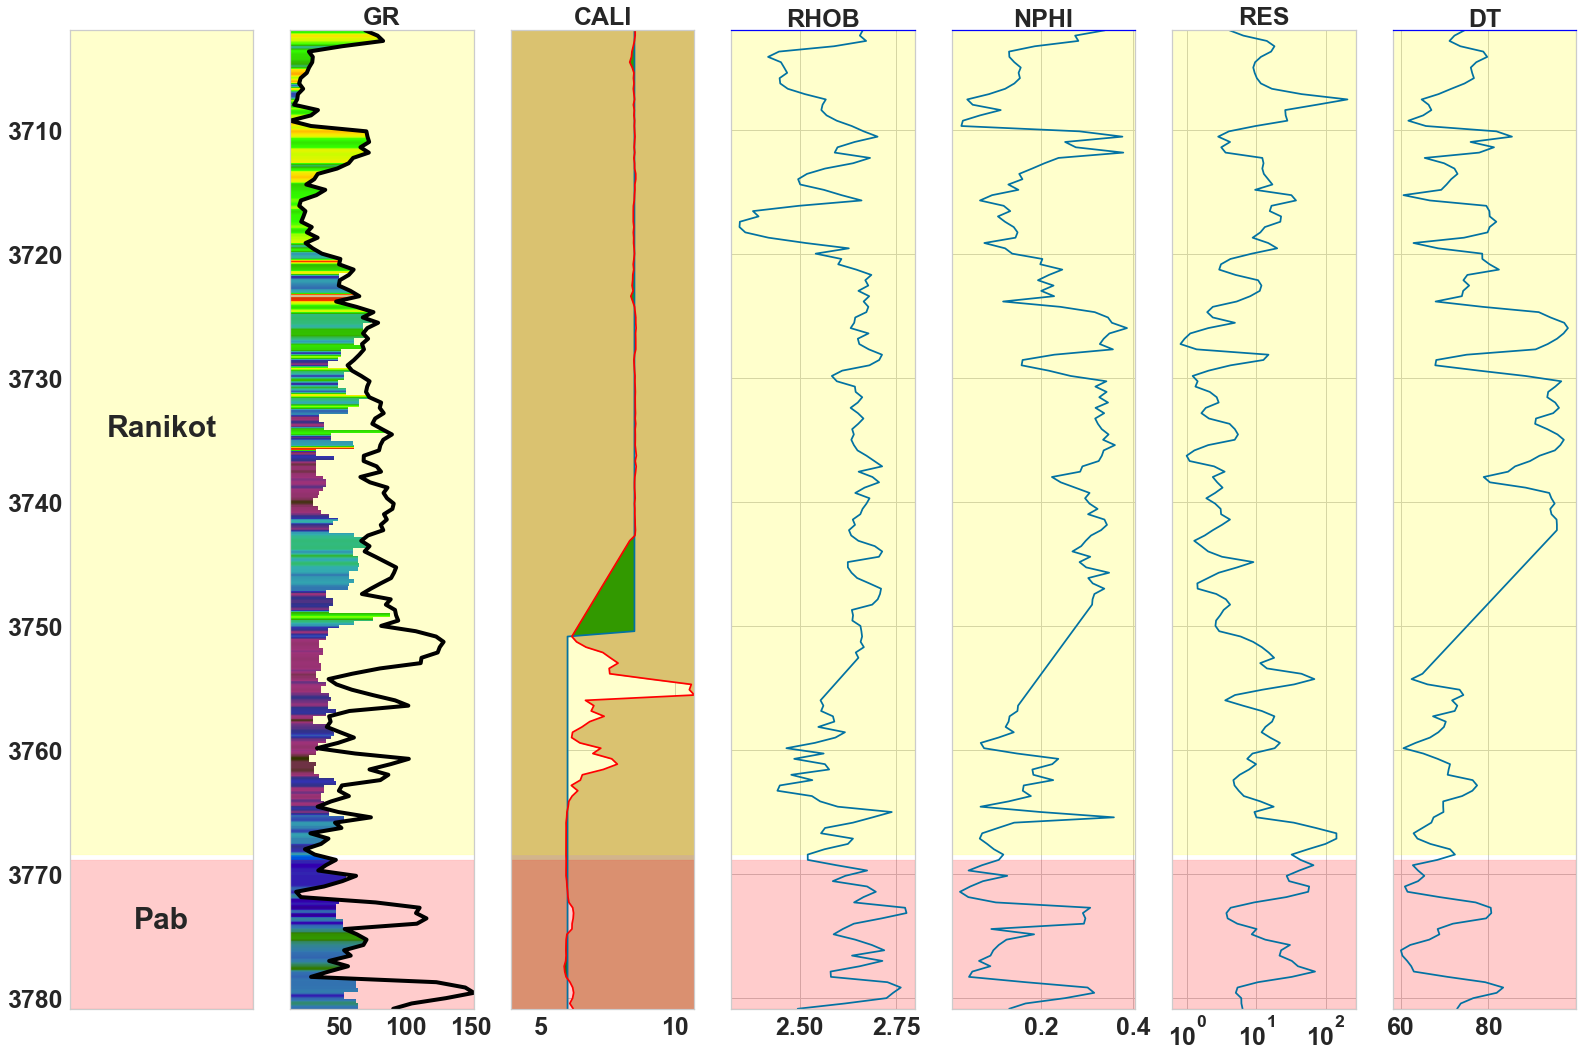

In [568]:
plotting = ["Formation","GR","CALI","RHOB","NPHI","RES","DT"]
fig,ax = plt.subplots(nrows=1,ncols=len(plotting),figsize=(27,18),sharey=True)
fig.subplots_adjust(wspace=0.2)
for j,i in enumerate(plotting):
    if i=="Formation":
        for aj,ai in enumerate(tops):
            ax[j].text( x = 0.5,  y = tops[aj], s = forms[aj],fontsize = '30', 
                    horizontalalignment = 'center',verticalalignment = 'bottom')
            ax[j].grid(False)
            ax[j].set_xticks([])
    if i=="RHOB":
        ax[j].plot(a[i],a["DEPTH"])
        ax[j].spines["top"].set_position(("axes", 1))

        ax[j].spines["top"].set_visible(True)
        ax[j].spines["top"].set_edgecolor("blue")
        ax[j].set_xlabel("RHOB",fontdict={"fontsize":25,"fontweight":'bold'})
        ax[j].xaxis.set_label_position("top")

    elif i=="RES":
        ax[j].semilogx(a[i],a["DEPTH"])
        ax[j].set_title(i,fontdict={"fontsize":25,"fontweight":'bold'})  
    elif i=="GR":
        a0 = ax[j].imshow(gr,aspect="auto",cmap="nipy_spectral",extent=[a["GR"].min(),a["GR"].max(),a["DEPTH"].max(),a["DEPTH"].min()])
        ax[j].fill_betweenx(a['DEPTH'],a["GR"], a["GR"].max(), interpolate=True, color='white')
        ax[j].plot(a["GR"],a["DEPTH"],color="black",label="GR",linewidth=4)
        ax[j].set_title(i,fontdict={"fontsize":25,"fontweight":'bold'})
        ax[j].grid(False)
    elif i=="CALI":
        ax[j].plot(a["BS"],a["DEPTH"])
        ax[j].fill_betweenx(a['DEPTH'], a["CALI"].max(), a["CALI"], interpolate=True, color='tan')
        ax[j].plot(a["CALI"],a["DEPTH"],color="red",label="CALI")
        ax[j].fill_betweenx(a['DEPTH'], 0, a["BS"], interpolate=True, color='tan')
        ax[j].fill_betweenx(a['DEPTH'], a["BS"],a["CALI"],where=a["BS"]>=a["CALI"], interpolate=True, color='green')
        ax[j].set_xlim([a["CALI"].min()-2,a["CALI"].max()])
        ax[j].set_title(i,fontdict={"fontsize":25,"fontweight":'bold'})
    elif i=="DT":
        ax[j].plot(a[i],a["DEPTH"])
        ax[j].spines["top"].set_position(("axes", 1))

        ax[j].spines["top"].set_visible(True)
        ax[j].spines["top"].set_edgecolor("blue")
        ax[j].set_xlabel("DT",fontdict={"fontsize":25,"fontweight":'bold'})
        ax[j].xaxis.set_label_position("top")

    elif i=="NPHI":
        ax[j].plot(a[i],a["DEPTH"])
        ax[j].spines["top"].set_position(("axes", 1))
        ax[j].spines["top"].set_visible(True)
        ax[j].spines["top"].set_edgecolor("blue")
        ax[j].set_xlabel("NPHI",fontdict={"fontsize":25,"fontweight":'bold'})
        ax[j].xaxis.set_label_position("top")
    
        

    elif (i!="Formation")&(i!="crossover"):
        ax[j].plot(a[i],a["DEPTH"])
        ax[j].set_xticks([])
        ax[j].set_title(i,fontdict={"fontsize":25,"fontweight":'bold'})
    elif i=="crossover":
#         ax[j].fill_betweenx(a['DEPTH'], a["CORRECT RHOB"],a["CORRECT RHOB"].max(), interpolate=True, color='yellow')

#         ax[j].fill_betweenx(a['DEPTH'], a["CORRECT RHOB"],a["CORRECT RHOB"].max(), interpolate=True, color='yellow')
#         ax[j].fill_betweenx(a['DEPTH'], a["CORRECT RHOB"],a["CORRECT RHOB"].min(), interpolate=True, color='green')
        x1=a['RHOB']
        x2=a['NPHI']
        x = np.array([x1.min(),x1.max()])
        z = np.array([x2.min(),x2.max()])
        nz=((x2-np.max(z))/(np.min(z)-np.max(z)))*(np.max(x)-np.min(x))+np.min(x)
        ax[j].fill_betweenx(a['DEPTH'], x1, nz, where=x1>=nz, interpolate=True, color='green')
        ax[j].fill_betweenx(a['DEPTH'], x1, nz, where=x1<=nz, interpolate=True, color='yellow')

        ax[j].plot(a["RHOB"],a["DEPTH"],color="red",label="RHOB")
        ax[j].set_xlim([a["RHOB"].min(),a["RHOB"].max()])
        ax[j].set_xticks([])
        ax[j] = ax[j].twiny()
#         ax[j].fill_betweenx(a['DEPTH'], a["CORRECT NPHI"],a["CORRECT NPHI"].max(), interpolate=True, color='white',alpha=1)
        ax[j].plot(a["NPHI"],a["DEPTH"],color="blue",label="NPHI")
#         ax[j].fill_betweenx(a['DEPTH'], a["CORRECT NPHI"],a["CORRECT NPHI"].max(), interpolate=True, color='green',alpha=1)
        ax[j].set_xlim([a["NPHI"].max(),a["NPHI"].min()])
       
        ax[j].spines["top"].set_position(("axes", 1))
        ax[j].spines["top"].set_visible(True)
        ax[j].spines["top"].set_edgecolor("blue")
        ax[j].set_xlim([a["NPHI"].max(),a["NPHI"].min()])
        
        ax[j].set_xticks([])
        ax[j].set_xlabel("Crossover",fontdict={"fontsize":15,"fontweight":'bold'})

        
    
    ax[j].axhspan(min1, min2,color="yellow",alpha=0.2)
    ax[j].axhspan(min3, min4,color="red",alpha=0.2)

In [445]:
# a = a[a["Formation"]!="Pab Formation"]
# a

In [449]:
a

,DEPTH,GR,RHOB,DT,Formation,RES,CORRECT RHOB,CORRECT DT
0,3627.1201,68.564,2.867,70.167,Khadro Sand,0.577,2.867,74.682760
1,3630.9299,82.398,2.550,82.836,Khadro Sand,0.340,2.550,85.155469
2,3633.1399,76.492,2.573,83.548,Khadro Sand,0.505,2.573,87.395029
3,3634.7400,71.660,2.522,70.309,Khadro Sand,0.847,2.522,81.235229
4,3636.3401,47.400,2.778,70.765,Khadro Sand,1.903,2.778,67.840030
...,...,...,...,...,...,...,...,...
251,4216.0698,41.923,2.621,57.643,Pab Formation,10.213,2.621,57.389681
252,4217.6699,32.908,2.681,54.413,Pab Formation,13.064,2.681,54.780869
253,4218.2798,39.019,2.657,56.370,Pab Formation,30.468,2.657,56.412829
254,4219.2700,50.408,2.706,58.864,Pab Formation,29.345,2.706,58.417049


In [448]:
a.to_csv(r"C:\work\Global_Petrophysics_ML\All_data\DONEQC\M_2.csv",index=False)

In [163]:
test_paths = glob.glob(os.path.join(r"C:\work\Global_Petrophysics_ML\All_data\Testing_csv","*.csv"))
testing_data = [pd.read_csv(i) for i in test_paths]
testing_data

[           DEPTH      GR  RES:1   RES:2  RHOB:1   RES:3      DT       P-IMP  \
 0      3624.0000     NaN    NaN     NaN     NaN     NaN     NaN         NaN   
 1      3624.0701     NaN    NaN     NaN     NaN     NaN     NaN         NaN   
 2      3624.0720  82.846  0.327   6.442   2.701   4.335  80.169  10269.1162   
 3      3624.1482  83.708  0.339   6.458   2.731   4.312  78.783  10565.8428   
 4      3624.1499     NaN    NaN     NaN     NaN     NaN     NaN         NaN   
 ...          ...     ...    ...     ...     ...     ...     ...         ...   
 13104  4239.6919     NaN  0.942  67.461   2.554  76.932     NaN         NaN   
 13105  4239.7681     NaN  0.947  67.439   2.560  76.920     NaN         NaN   
 13106  4239.8442     NaN  0.947  67.439   2.560  76.920     NaN         NaN   
 13107  4239.9204     NaN  0.923  67.423   2.569  76.932     NaN         NaN   
 13108  4239.9966     NaN  0.923  67.423   2.569  76.932     NaN         NaN   
 
        DPTM  PHIE      SDT:1  RHOB:2 